In [1]:
#@title Montar al Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#@title LIBRERIAS TRABAJO
import numpy as np 
import cv2
import os
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten, Dropout, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *
from PIL import Image
from google.colab.patches import cv2_imshow

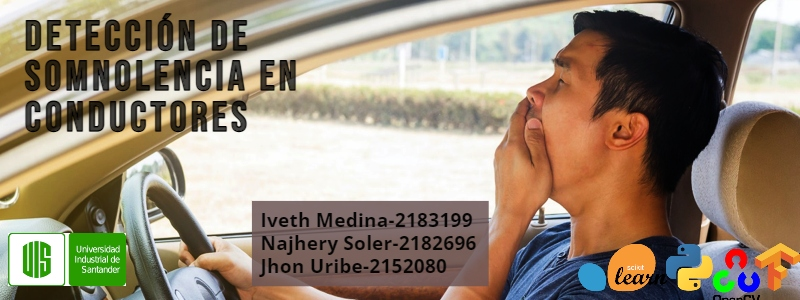

In [3]:
#@title IMAGEN
from IPython.display import Image 
Image('/content/drive/My Drive/Proyecto IA/somnolencia.jpg')

In [4]:
#@title PARTICION DATASET
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train = train_datagen.flow_from_directory(
        directory = '/content/drive/My Drive/Proyecto IA/dataset_new/train',
        target_size=(100, 100),
        batch_size=32,
        class_mode='binary')

test = test_datagen.flow_from_directory(
        directory = '/content/drive/My Drive/Proyecto IA/dataset_new/test',
        target_size=(100, 100),
        batch_size=32,
        class_mode='binary')

Found 2467 images belonging to 4 classes.
Found 433 images belonging to 4 classes.


In [5]:
#@title VERIFICACION
base_dir =  r'/content/drive/My Drive/Proyecto IA/dataset_new'
folders = os.listdir(base_dir)
print(folders)

base_dir =  r'/content/drive/My Drive/Proyecto IA/dataset_new/train'
folders = os.listdir(base_dir)
print(folders)

base_dir =  r'/content/drive/My Drive/Proyecto IA/dataset_new/test'
folders = os.listdir(base_dir)
print(folders)

['train', 'test']
['Open', 'no_yawn', 'Closed', 'yawn']
['no_yawn', 'yawn', 'Open', 'Closed']


In [6]:
#@title CANTIDAD DE IMAGENES EN TEST Y TRAIN 
directory_train_open='/content/drive/My Drive/Proyecto IA/dataset_new/train/Open'
directory_train_closed='/content/drive/My Drive/Proyecto IA/dataset_new/train/Closed'
directory_train_yawn='/content/drive/My Drive/Proyecto IA/dataset_new/train/yawn'
directory_train_no_yawn='/content/drive/My Drive/Proyecto IA/dataset_new/train/no_yawn'

ojos_abiertos_train = sorted(os.listdir(directory_train_open))
ojos_cerrados_train =  sorted(os.listdir(directory_train_closed))
bostezo_train= sorted(os.listdir(directory_train_yawn))
no_bostezo_train =  sorted(os.listdir(directory_train_no_yawn))

#Cantidad de imágenes que se tienen de cada clase de train
print("cantidad de imágenes en train:")
print("ojos abiertos :",len(ojos_abiertos_train))
print("ojos_cerrados :",len(ojos_cerrados_train))
print("bostezo :",len(bostezo_train))
print("no_bostezo :",len(no_bostezo_train))


abierto = sorted(os.listdir(base_dir +'/Open'))
cerrado =  sorted(os.listdir(base_dir +'/Closed'))
bostezar = sorted(os.listdir(base_dir +'/yawn'))
no_bostezar =  sorted(os.listdir(base_dir +'/no_yawn'))
print("\n")
#Cantidad de imágenes que se tienen de cada clase en test
print("cantidad de imágenes en test:")
print("ojos abiertos:",len(abierto))
print("ojos cerrados:",len(cerrado))
print("bostezando :",len(bostezar))
print("no bostezando :",len(no_bostezar))


cantidad de imágenes en train:
ojos abiertos : 617
ojos_cerrados : 617
bostezo : 617
no_bostezo : 616


cantidad de imágenes en test:
ojos abiertos: 109
ojos cerrados: 109
bostezando : 106
no bostezando : 109


In [7]:
#@title REDUCCION DE LAS IMAGENES EN ESCALA DE GRISES TEST

labels= []#X
data=[]#Y

directory_test_open='/content/drive/My Drive/Proyecto IA/dataset_new/test/Open'
directory_test_closed='/content/drive/My Drive/Proyecto IA/dataset_new/test/Closed'
directory_test_yawn='/content/drive/My Drive/Proyecto IA/dataset_new/test/yawn'
directory_test_no_yawn='/content/drive/My Drive/Proyecto IA/dataset_new/test/no_yawn'

#Se realiza el proceso para la primera carpeta abierto test y agregamos al label un valor de 0
for k in abierto:
  img = cv2.imread(directory_test_open+'/'+k) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (64,64))
  data.append(gris.flatten())
  labels.append(0)


#Se realiza el proceso para la carpeta cerrado test y agregamos al label un valor de 1
for l in cerrado:
  img = cv2.imread(directory_test_closed+'/'+l) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (64,64))
  data.append(gris.flatten())
  labels.append(1)

#Se realiza el proceso para la carpeta yawn test y agregamos al label un valor de 2
for i in bostezar:
  img = cv2.imread(directory_test_yawn+'/'+i) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (64,64))
  data.append(gris.flatten())
  labels.append(2)

#Se realiza el proceso para la arpeta no_yawny agregamos al label un valor de 3
for j in no_bostezar:
  img = cv2.imread(directory_test_no_yawn+'/'+j) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (64,64))
  data.append(gris.flatten())
  labels.append(3)



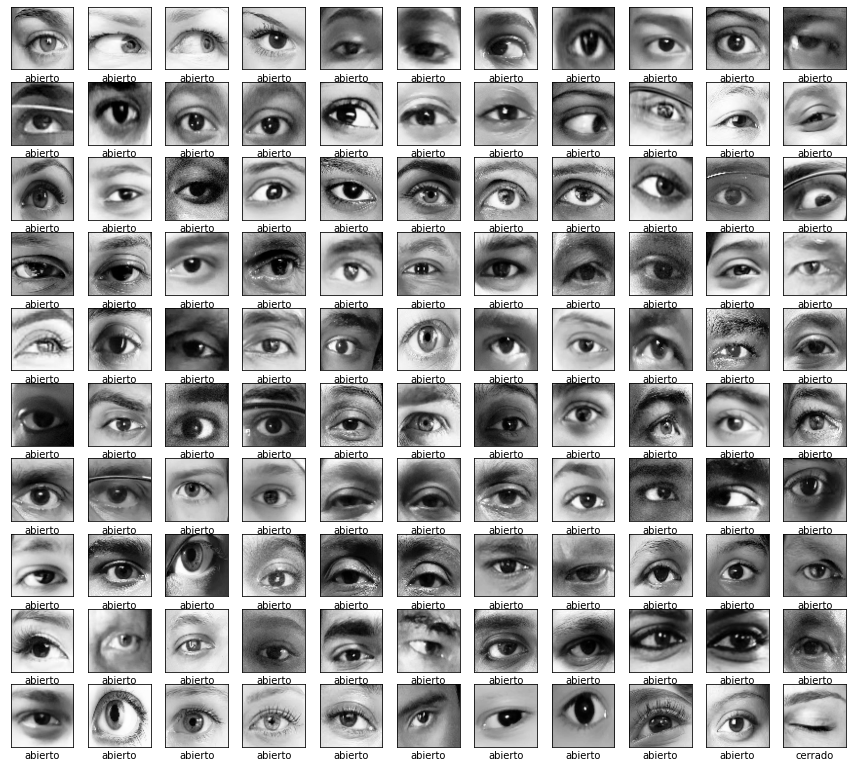

In [8]:
#@title VERIFICACION IMAGENES EN GRIS TEST
class_names_test = ['abierto','cerrado','bostezar','no_bostezar']
plt.figure(figsize=(15,15))
for i in range(110):
    plt.subplot(11,11,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow( data[i].reshape(64,64), cmap=plt.cm.Greys_r)
    plt.xlabel(class_names_test[labels[i]])

In [9]:
#@title REDUCCION DE LAS IMAGENES EN ESCALA DE GRISES TRAIN
data_train = [] #X
labels_train = []#y
#Se realiza el proceso para la primera carpeta abierto train y agregamos al label un valor de 0
for k in ojos_abiertos_train:
  img = cv2.imread(directory_train_open+'/'+k) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (64,64))
  data_train.append(gris.flatten())
  labels_train.append(0)


#Se realiza el proceso para la carpeta cerrado trainy agregamos al label un valor de 1
for l in ojos_cerrados_train:
  img = cv2.imread(directory_train_closed+'/'+l) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (64,64))
  data_train.append(gris.flatten())
  labels_train.append(1)

#Se realiza el proceso para la carpeta yawn train y agregamos al label un valor de 2
for i in bostezo_train:
  img = cv2.imread(directory_train_yawn+'/'+i) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (64,64))
  data_train.append(gris.flatten())
  labels_train.append(2)

#Se realiza el proceso para la arpeta no_yawn train agregamos al label un valor de 3
for j in no_bostezo_train:
  img = cv2.imread(directory_train_no_yawn+'/'+j) 
  gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gris = cv2.resize(gris, (64,64))
  data_train.append(gris.flatten())
  labels_train.append(3)


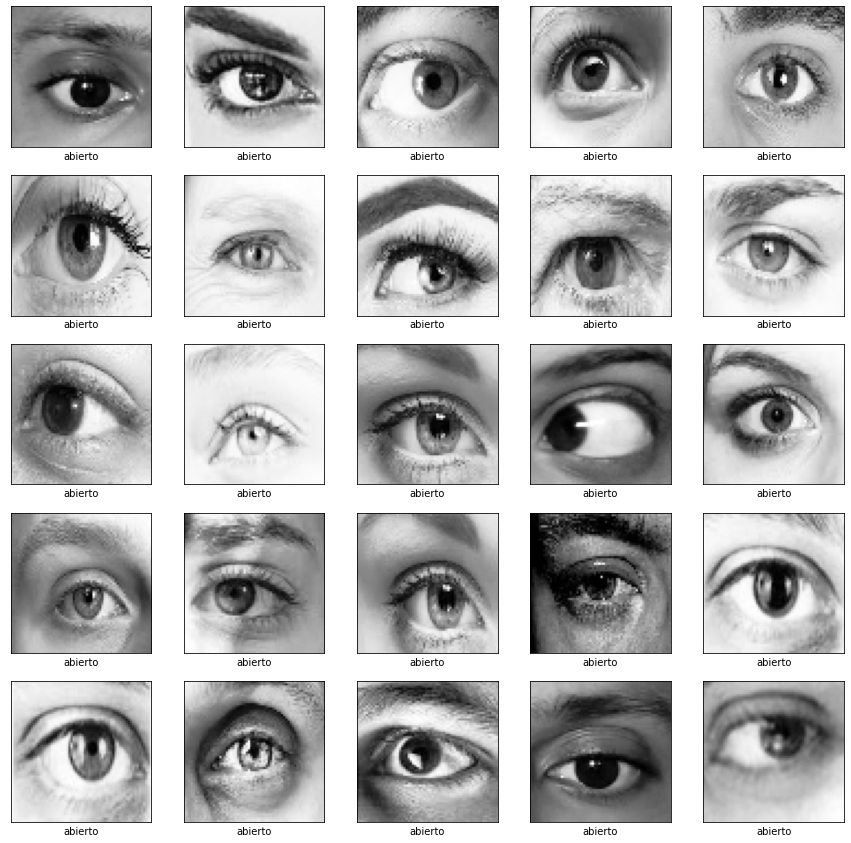

In [10]:
#@title VERIFICACION IMAGENES EN GRIS TRAIN
class_names_train = ['abierto','cerrado','bostezar','no_bostezar']
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow( data_train[i].reshape(64,64), cmap=plt.cm.Greys_r)
    plt.xlabel(class_names_train[labels_train[i]])

In [11]:
imagenes1 = np.array(data) #test
imagenes2 = np.array(data_train)
labels1 = np.array(labels)#test
labels2 = np.array(labels_train)

#test
imagenes1 = imagenes1.astype(np.float32)
labels1 = labels1.astype(np.int32)

#train
imagenes2 = imagenes2.astype(np.float32)
labels2 = labels2.astype(np.int32)

In [12]:
#@title CONCATENACIÓN IMAGENES TRAIN Y TEST
c= np.concatenate((imagenes1,imagenes2), axis=0)
con=np.concatenate((labels1,labels2), axis=0)

In [13]:
#@title PERMUTACIÓN
per1 = np.random.permutation(range(len(c)))
imagenes_concatenadas = c[per1]
labels_concatenadas = con[per1]

In [14]:
X_tr = imagenes2
X_te = imagenes1
y_tr = labels2
y_te = labels1

#**Implementación de los modelos de clasificación**

####GAUSSIAN NB

In [15]:
# GAUSSIAN NB PARA IMAGENES concatenadas
from sklearn.naive_bayes import GaussianNB

estimador = GaussianNB()

estimador.fit(X_tr,y_tr)
pred = estimador.predict(X_te)
score = cross_val_score(estimador, imagenes_concatenadas, labels_concatenadas, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy score: %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))

accuracy score: 0.712 (+/- 0.03920)


In [16]:
from sklearn.naive_bayes import GaussianNB

estimador = GaussianNB()
estimador.fit(X_tr,y_tr)
print("%.3f"%accuracy_score(estimador.predict(X_te), y_te))

0.751


In [17]:
#@title **Matriz de Confusión**
### la clase 0 es ojo abierto
### la clase 1 es ojo cerrado
### la clase 2 es bostezo
### la clase 3 es no bostezo
predicciones_test  = estimador.predict(X_te)

cm_test = confusion_matrix(y_te, predicciones_test)
print( "matrix de confusión en test\n", cm_test)

matrix de confusión en test
 [[ 91  15   3   0]
 [ 16  88   4   1]
 [  1   0  43  62]
 [  0   0   6 103]]


In [18]:
accuracy_lista=[]
a=accuracy_score(estimador.predict(X_te), y_te)

#### DESICION TREE CLASSIFIER

In [19]:
from sklearn.tree import DecisionTreeClassifier

estimador = DecisionTreeClassifier(max_depth=20)

estimador.fit(X_tr, y_tr)
predicciones = estimador.predict(X_te)
score = cross_val_score(estimador, imagenes_concatenadas, labels_concatenadas, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy score: %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))

accuracy score: 0.847 (+/- 0.02103)


In [20]:
from sklearn.tree import DecisionTreeClassifier

estimador = DecisionTreeClassifier(max_depth=20)

estimador.fit(X_tr, y_tr)
print("%.3f"%accuracy_score(estimador.predict(X_te), y_te))
b=accuracy_score(estimador.predict(X_te), y_te)


0.871


In [21]:
#@title **Matriz de Confusión**
predicciones_test  = estimador.predict(X_te)

cm_test = confusion_matrix(y_te, predicciones_test)
print( "matrix de confusión en test\n", cm_test)

matrix de confusión en test
 [[91 16  1  1]
 [13 96  0  0]
 [ 1  1 91 13]
 [ 0  1  9 99]]


####RANDOM FOREST CLASSIFIER

In [22]:
from sklearn.ensemble import RandomForestClassifier
estimador = RandomForestClassifier()

estimador.fit(X_tr, y_tr)
predicciones = estimador.predict(X_te)
score = cross_val_score(estimador, imagenes_concatenadas, labels_concatenadas, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy score: %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))

accuracy score: 0.941 (+/- 0.01469)


In [23]:
from sklearn.ensemble import RandomForestClassifier

estimador = RandomForestClassifier()
estimador.fit(X_tr, y_tr)
print("%.3f"%accuracy_score(estimador.predict(X_te), y_te))
c=accuracy_score(estimador.predict(X_te), y_te)

0.942


In [24]:
#@title **Matriz de Confusión**
predicciones_test  = estimador.predict(X_te)

cm_test = confusion_matrix(y_te, predicciones_test)
print( "matrix de confusión en test\n", cm_test)

matrix de confusión en test
 [[104   5   0   0]
 [ 10  99   0   0]
 [  1   0  98   7]
 [  0   0   2 107]]


####SVC


In [25]:
estimador = SVC();

estimador.fit(X_tr, y_tr);
predicciones = estimador.predict(X_te)
score = cross_val_score(estimador, imagenes_concatenadas, labels_concatenadas, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy score: %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))

accuracy score: 0.876 (+/- 0.01491)


In [26]:
estimador = SVC();

estimador.fit(X_tr, y_tr);
print("%.3f"%accuracy_score(estimador.predict(X_te), y_te))
d=accuracy_score(estimador.predict(X_te), y_te)

0.882


In [27]:
#@title **Matriz de Confusión**
predicciones_test  = estimador.predict(X_te)

cm_test = confusion_matrix(y_te, predicciones_test)
print( "matrix de confusión en test\n", cm_test)

matrix de confusión en test
 [[ 96  13   0   0]
 [  7 102   0   0]
 [  0   0  78  28]
 [  0   0   3 106]]


In [28]:
t=np.append(accuracy_lista, [a, b, c, d])
t

array([0.75057737, 0.87066975, 0.94226328, 0.88221709])

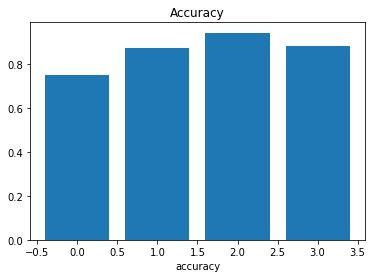

In [29]:
from matplotlib import pyplot as plt 
import numpy as np  
   
plt.bar(range(len(t)),t) 
plt.title("Accuracy") 
plt.xlabel("accuracy")
plt.show()

###REDES NEURONALES

In [30]:
X_train = X_tr.reshape([-1, 64, 64, 1])
X_test = X_te.reshape([-1, 64, 64, 1])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train.shape

(2467, 64, 64, 1)

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(  input_shape=(64,64,1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               524416    
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 4)                 132       
                                                                 
Total params: 534,884
Trainable params: 534,884
Non-trainable params: 0
_________________________________________________________________


In [57]:
#entrenando con una red neuronal básica
model.compile(optimizer=tf.keras.optimizers.SGD(),   
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_tr, epochs=20)

Epoch 1/20
78/78 [==============================] - 1s 6ms/step - loss: 0.3160 - accuracy: 0.8695
Epoch 2/20
78/78 [==============================] - 0s 6ms/step - loss: 0.3115 - accuracy: 0.8808
Epoch 3/20
78/78 [==============================] - 0s 6ms/step - loss: 0.3314 - accuracy: 0.8606
Epoch 4/20
78/78 [==============================] - 0s 6ms/step - loss: 0.3178 - accuracy: 0.8606
Epoch 5/20
78/78 [==============================] - 0s 6ms/step - loss: 0.3149 - accuracy: 0.8760
Epoch 6/20
78/78 [==============================] - 0s 6ms/step - loss: 0.3000 - accuracy: 0.8861
Epoch 7/20
78/78 [==============================] - 0s 6ms/step - loss: 0.2951 - accuracy: 0.8816
Epoch 8/20
78/78 [==============================] - 0s 6ms/step - loss: 0.2887 - accuracy: 0.8930
Epoch 9/20
78/78 [==============================] - 0s 6ms/step - loss: 0.2866 - accuracy: 0.8893
Epoch 10/20
78/78 [==============================] - 0s 6ms/step - loss: 0.2781 - accuracy: 0.8901
Epoch 11/20
78/78 [

In [58]:
#@title *code* Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_te)

print('Test accuracy:', test_acc)

14/14 [==============================] - 0s 3ms/step - loss: 0.3254 - accuracy: 0.8591
Test accuracy: 0.8591223955154419


the number predicted is:  1


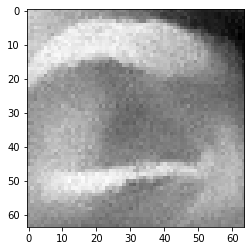

In [52]:
#@title *code* individual predictions
### la clase 0 es ojo abierto
### la clase 1 es ojo cerrado
### la clase 2 es bostezo
### la clase 3 es no bostezo
img_rows, img_cols =64, 64
image_index = 120
plt.imshow(X_test[image_index].reshape(64, 64),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, img_rows, img_cols, 1))
print("the number predicted is: ", pred.argmax())

the number predicted is:  3


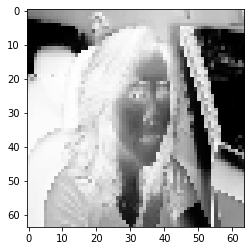

In [51]:
#@title *code* individual predictions
img_rows, img_cols =64, 64
image_index = 420
plt.imshow(X_test[image_index].reshape(64, 64),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, img_rows, img_cols, 1))
print("the number predicted is: ", pred.argmax())

Red Convolucional

In [34]:
#@title *code* CNN
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), input_shape=(64,64,1), activation='relu'), 
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(.2, input_shape=(2,)),
  tf.keras.layers.Dense(60, activation=tf.nn.relu),
  tf.keras.layers.Dense(4, activation=tf.nn.softmax) 
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [35]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(X_train, y_tr, epochs=20, batch_size=70, verbose=1, validation_data=(X_test, y_te))

Epoch 1/20
36/36 [==============================] - 14s 363ms/step - loss: 0.8023 - accuracy: 0.5918 - val_loss: 0.5884 - val_accuracy: 0.7298
Epoch 2/20
36/36 [==============================] - 13s 360ms/step - loss: 0.4542 - accuracy: 0.7637 - val_loss: 0.3960 - val_accuracy: 0.7921
Epoch 3/20
36/36 [==============================] - 13s 359ms/step - loss: 0.3986 - accuracy: 0.7973 - val_loss: 0.3610 - val_accuracy: 0.8152
Epoch 4/20
36/36 [==============================] - 13s 359ms/step - loss: 0.3352 - accuracy: 0.8233 - val_loss: 0.3736 - val_accuracy: 0.8152
Epoch 5/20
36/36 [==============================] - 13s 358ms/step - loss: 0.3019 - accuracy: 0.8557 - val_loss: 0.3080 - val_accuracy: 0.8268
Epoch 6/20
36/36 [==============================] - 13s 361ms/step - loss: 0.2660 - accuracy: 0.8715 - val_loss: 0.3034 - val_accuracy: 0.8499
Epoch 7/20
36/36 [==============================] - 13s 368ms/step - loss: 0.2526 - accuracy: 0.8837 - val_loss: 0.2811 - val_accuracy: 0.8684

In [37]:
test_loss,test_acc = model.evaluate(X_test, y_te, verbose=1)
print('Test accuracy:', test_acc)

14/14 [==============================] - 1s 42ms/step - loss: 0.1337 - accuracy: 0.9515
Test accuracy: 0.9515011310577393


Conclusiones


1.   En los métodos que obtuvimos mejores resultados fue en Random Forest y red neuronal
2.   Podemos ver que la matriz de confusión del método Gaussian-NB tomo muchas imagenes de ojos cerrados como si fueran abiertos.
3.   Para aplicar los diferentes métodos de clasificación y que estos funcionen de una mejor manera tenemos que hacer un tratamiento de las imágenes.

